## Perform regression analysis using the libraries 'sklearn' and 'statsmodels' 

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn import linear_model
import statsmodels.api as sm

In [4]:
# Read the data
concrete = pd.read_csv('F:/2020.2/Data Mining/HW/HM2 12.6/concrete.csv')
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


The concrete dataset can also be taken from UCI repository. https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

The information given in the dataset:

`Cement` (component 1) -- quantitative -- $kg$ in a $m^3$ mixture -- Input Variable

`Blast Furnace Slag` (component 2) -- quantitative -- $kg$ in a $m^3$ mixture -- Input Variable

`Fly Ash` (component 3) -- quantitative -- $kg$ in a $m^3$ mixture -- Input Variable

`Water` (component 4) -- quantitative -- $kg$ in a $m^3$ mixture -- Input Variable

`Superplasticizer` (component 5) -- quantitative -- $kg$ in a $m^3$ mixture -- Input Variable

`Coarse Aggregate` (component 6) -- quantitative -- $kg$ in a $m^3$ mixture -- Input Variable

`Fine Aggregate` (component 7) -- quantitative -- $kg$ in a $m^3$ mixture -- Input Variable

`Age` -- quantitative -- Day (1~365) -- Input Variable

`Concrete compressive strength` -- quantitative -- $MPa$ -- **Output Variable**

In [5]:
concrete.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [6]:
# Now the data is ided into independent (X) and dependent (y) variables 
X = concrete.values[:,0:8]
y = concrete.values[:,8]

<br>

### Running linear regression using sklearn

Using sklearn linear regression can be carried out using LinearRegression( ) class. sklearn automatically adds an intercept term to our model.

In [7]:
# Running linear regression using sklearn
lm = linear_model.LinearRegression()
lm.fit(X, y)

LinearRegression()

In [8]:
# The intercept and coefficients
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 -23.33121358490346
Coefficients: 
 [ 0.11980433  0.10386581  0.08793432 -0.14991842  0.2922246   0.01808621
  0.02019035  0.11422207]


* This output includes the intercept and coefficients. We can use this information to build the multiple linear regression equation as follows:

$$y=-23.33+0.1198X_1+0.1036X_2 + 0.0879X_3 - 0.1499X_4 +0.2922X_5 + 0.0181X_6 + 0.0202X_7 + 0.1142X_8$$

<br>

### Running linear regression using statsmodels

It is to be noted that statsmodels does not add intercept term automatically thus we need to create an intercept to our model.

In [9]:
# Running linear regression using statsmodels
import statsmodels.api as sm
X1 = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

In [10]:
# Linear regression can be run by using sm.OLS:
import statsmodels.api as sm
lm2 = sm.OLS(y, X1).fit()

In [11]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          6.29e-206
Time:                        13:57:06   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.3312     26.586     -0.878      0.3

From the above results, we can see the p-value of the constant is $p=0.380$, it is high, and indicates lower significance. On the other hand, the accuracy assessment $R^2=0.616$, it also indicates not good result. So we consider to remove the constant first, and observe the new model.

In [12]:
# Linear regression can be run by using sm.OLS:
import statsmodels.api as sm
lm3 = sm.OLS(y, X).fit()

In [13]:
print(lm3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1732.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):                        0.00
Time:                        13:57:09   Log-Likelihood:                         -3869.4
No. Observations:                1030   AIC:                                      7755.
Df Residuals:                    1022   BIC:                                      7794.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

From the above results, we can see all the p-values of the dependent variables are less than $0.05$. It indicates high significance. On the other hand, the accuracy assessment $R^2=0.931$, and adjusted R-square is $0.931$, it also indicates good fit. So I think this model is appropriate. We can use this information to build the multiple linear regression equation as follows:

$$y=0.1134X_1+0.0962X_2 + 0.0793X_3 - 0.1822X_4 +0.2647X_5 + 0.0103X_6 + 0.0113X_7 + 0.1140X_8$$

It indicates that given other features, a unit increase in `cement` is associated with a 0.1134 unit increase in `the final compressive strength`, and so on.

<br>

### Diagnostic Plots

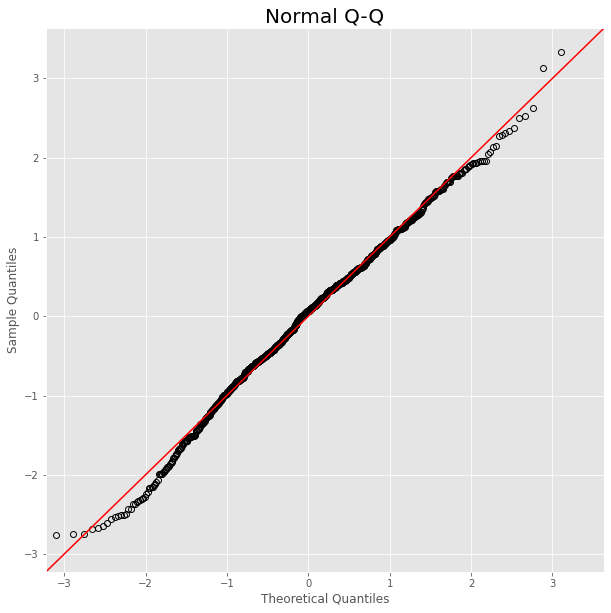

In [14]:
import matplotlib.pyplot as plt

# Normal Q-Q Plot
plt.rc('figure', figsize=(10,10))
plt.style.use('ggplot')

probplot = sm.ProbPlot(lm3.get_influence().resid_studentized_internal, fit=True)
fig = probplot.qqplot(line='45', marker='o', color='black',mfc='none')
plt.title('Normal Q-Q', fontsize=20)
plt.show()

* The data points follow the 45-degree line without deviating strongly, so we can assume that the residuals are normally distributed. If the residuals did not follow a normal distribution, you would see the data points spike away from the 45-degree line.


Text(0, 0.5, 'Residuals')

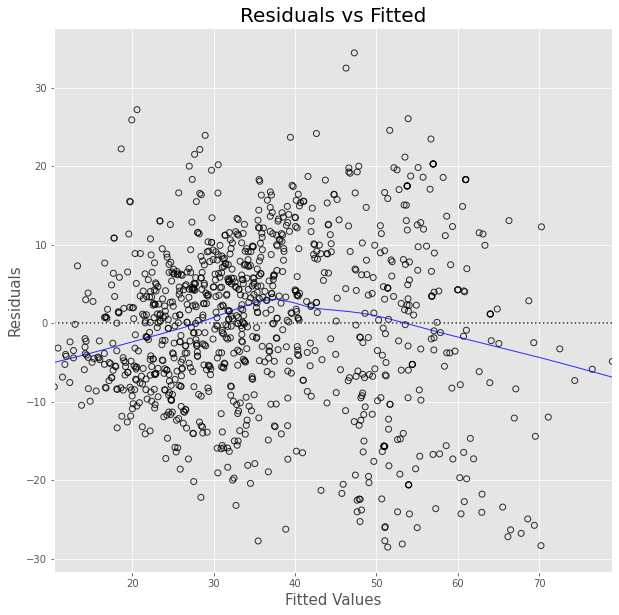

In [15]:
import seaborn as sn
# Residuals vs Fitted
sn.residplot(lm3.fittedvalues, y, data=concrete, 
                          lowess=True, 
                          scatter_kws={'facecolors':'none', 'edgecolors':'black'}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})

plt.title('Residuals vs Fitted', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)

* The Residuals vs Fitted plot helps us look for non-linear patterns not captured by the model. The lowess regression line does not appear to follow any particular pattern, and the data points seem to be spread fairly evenly across the dotted line. This is a good sign that there are no non-linear relationships between the outcome and predictors.


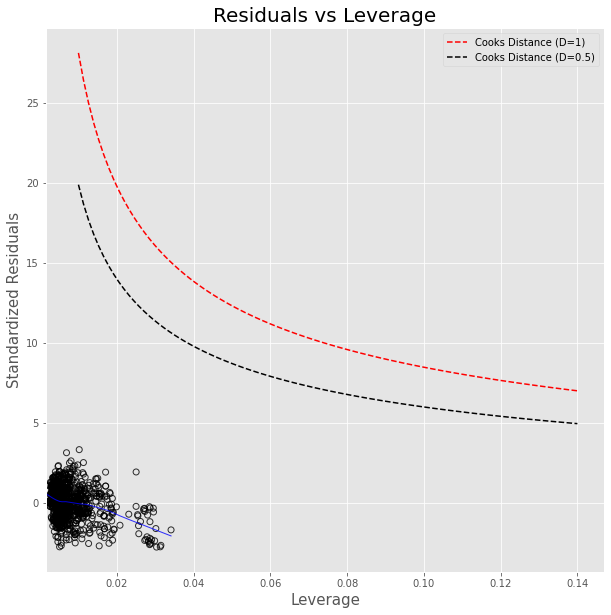

In [16]:
# Residuals vs Leverage (Cook’s Distance)
from numpy import sqrt

def one_line(x):
    return sqrt((1 * len(lm3.params) * (1 - x)) / x)

def point_five_line(x):
    return sqrt((0.5 * len(lm3.params) * (1 - x)) / x)
    
    
    
def show_cooks_distance_lines(tx,inc,color,label):
    plt.plot(inc,tx(inc), label=label,color=color, ls='--')
    
        

sn.regplot(lm3.get_influence().hat_matrix_diag, 
           lm3.get_influence().resid_studentized_internal, 
            scatter=True, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},
          scatter_kws={'facecolors':'none', 'edgecolors':'black'})

show_cooks_distance_lines(one_line,
                        np.linspace(.01,.14,100),
                          'red',
                          'Cooks Distance (D=1)' )

show_cooks_distance_lines(point_five_line,
                          np.linspace(.01,.14,100),
                          'black',
                          'Cooks Distance (D=0.5)')

plt.title('Residuals vs Leverage', fontsize=20)
plt.xlabel('Leverage', fontsize=15)
plt.ylabel('Standardized Residuals', fontsize=15)
plt.legend()

* Some outliers are not necessarily influential in terms of leverage, and some values can be well within the range of the data and still be influential. This is were a Residuals vs Leverage plot really comes in handy. Highly influential values can greatly alter the calculation of the regression line. If a value is outside of the cook’s distance contours, that value is influential and excluding it would change the results of the model. Our model certainly has some outliers, but no values are outside of the cook’s distance contours.


<br>

## Execute random forest regression to calculate and evaluate the feature importance

Feature: 0, Score: 0.32735
Feature: 1, Score: 0.08249
Feature: 2, Score: 0.01787
Feature: 3, Score: 0.10492
Feature: 4, Score: 0.07028
Feature: 5, Score: 0.02880
Feature: 6, Score: 0.03750
Feature: 7, Score: 0.33079


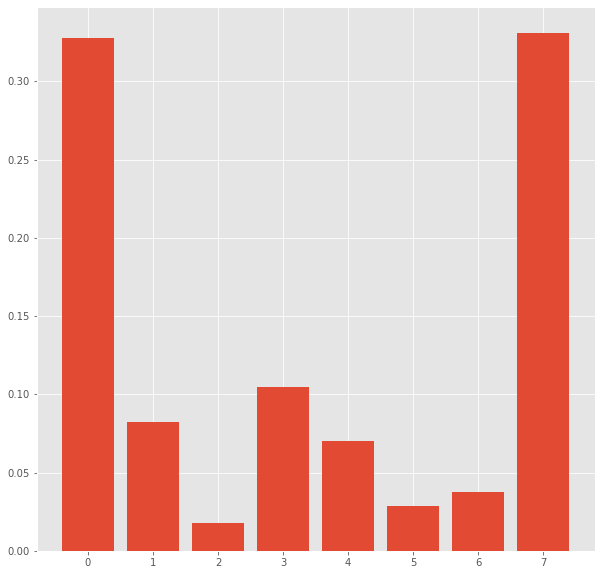

In [17]:
# random forest for feature importance on a regression problemfrom sklearn.datasets import make_regression

from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

* The results suggest perhaps two of the 8 features as being important to prediction, and the important features are `cement`, `water` and `age`.
